In [24]:
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Vizuelizacija

In [20]:
labels = {
    0:"A",1:"Agol",2:"Amin",3:"B",4:"Beskonechnost",5:"C",6:"CH",7:"Centar",8:"Cvekje",9:"D",10:"DJ",
    11:"DZ",12:"Delenje",13:"Dopir",14:"E",15:"F",16:"Fizika",17:"G",18:"H",19:"I",20:"Jas",21:"Javanje",22:"K",
    23:"Kolache",24:"Korona",25:"Krst",26:"Kukja",27:"L",28:"LJ",29:"M",30:"Mnogu",31:"N",32:"NJ",33:"O",34:"P",
    35:"Peperutka",36:"Pritisok",37:"Prst",38:"R",39:"Rob",40:"S",41:"SH",42:"Sever",43:"Sida",44:"Sin",45:"Svekja",
    46:"T",47:"Telefon",48:"TojTaaToa",49:"U",50:"V",51:"Valkano",52:"Vilushka",53:"Z",54:"ZH",55:"Zamenki",56:"Zholtica",57:"Zoshto"
}

In [55]:
model = load_model("ResNet_model2.h5")

In [56]:
test = pd.read_csv("test.csv")

In [57]:
test_labels = test['target']

In [58]:
test_labels_new = np_utils.to_categorical(test_labels)

In [59]:
test_paths = test['image_path']

In [60]:
test['target'] = test['target'].apply(str)

In [61]:
test_datagen = ImageDataGenerator()

In [62]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',shuffle=False)

Found 58 validated image filenames belonging to 58 classes.


In [63]:
files=test_generator.filenames
class_dict=test_generator.class_indices 
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key 

In [64]:
predictions = model.predict(test_generator)

1/1 [==============================] - 3s 3s/step


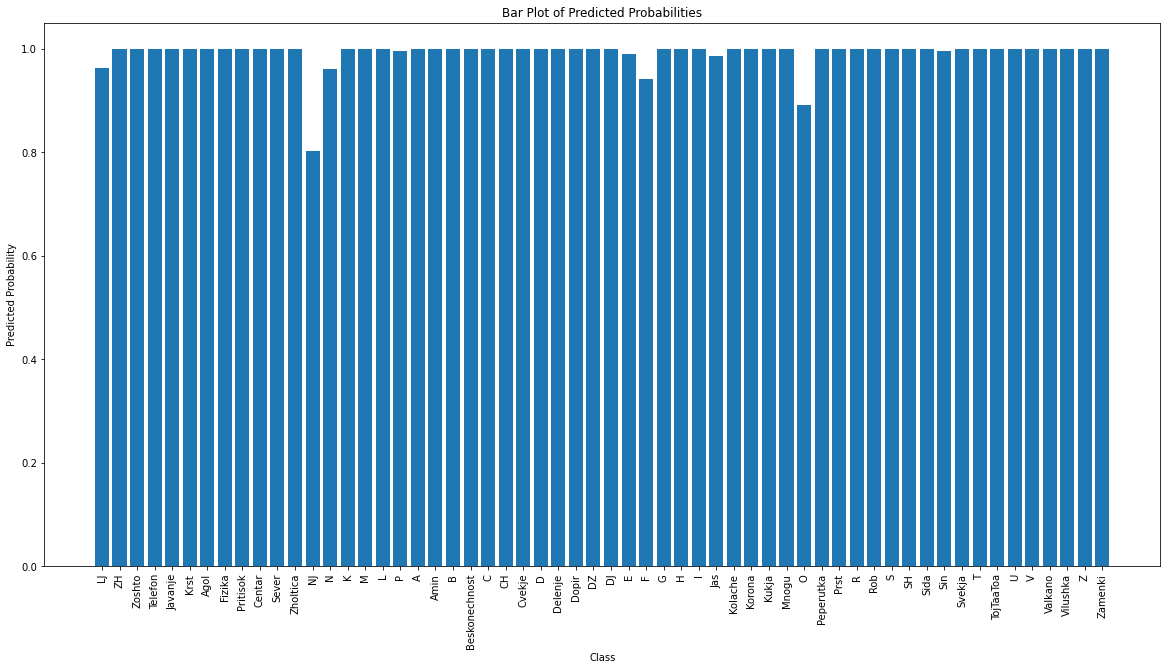

In [68]:
probs = [np.max(p) for i, p in enumerate(predictions)]
classes = [rev_dict[np.argmax(p)] for i, p in enumerate(predictions)]
class_values = [labels[int(float(class_))] for class_ in classes]

plt.figure(figsize = (20, 10))
plt.bar(class_values, probs)
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.title('Bar Plot of Predicted Probabilities')
plt.xticks(rotation=90)
plt.show()